# Brain Tumor Detection - Dataset Preparation

## Include necessary libraries

We'll need the following libraries to prepare our dataset.

In [12]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
# from google.colab.patches import cv2_imshow
%matplotlib inline

Import Google Drive, where we'll be storing our dataset so we can use them later. (Persistent preparation of Dataset).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## Extract the Dataset

Dataset taken from [this link](https://figshare.com/articles/brain_tumor_dataset/1512427), which consists of brain tumor images belonging to 3 classes of tumor along with other details present in .mat format.

Create a folder in Google Drive under Colab Notebooks folder named dataset, where we'll be extracting our main zip file.

In [3]:
if not os.path.exists('dataset'):
  os.mkdir('dataset')

Extract the dataset .zip file

In [4]:
with zipfile.ZipFile('1512427.zip') as zf:
  zip_dir = zf.namelist()[0]
  zf.extractall('dataset')

List the extracted files

In [5]:
!ls 'dataset/'

README.txt                         bt_set2
brainTumorDataPublic_1-766.zip     bt_set3
brainTumorDataPublic_1533-2298.zip bt_set4
brainTumorDataPublic_2299-3064.zip cvind.mat
brainTumorDataPublic_767-1532.zip  imageData
bt_set1


Let's go through the README file for the information about the dataset

In [6]:
!cat 'dataset/README.txt'

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a

Extract all the 4 zip files of brain tumor, consisting .mat files

In [7]:
with zipfile.ZipFile('dataset/brainTumorDataPublic_1-766.zip') as zf:
  os.mkdir('dataset/bt_set1')
  zip_dir = zf.namelist()[0]
  zf.extractall('dataset/bt_set1')

FileExistsError: [Errno 17] File exists: 'dataset/bt_set1'

In [ ]:
with zipfile.ZipFile('dataset/brainTumorDataPublic_767-1532.zip') as zf:
  os.mkdir('dataset/bt_set2')
  zip_dir = zf.namelist()[0]
  zf.extractall('dataset/bt_set2')

In [ ]:
with zipfile.ZipFile('dataset/brainTumorDataPublic_1533-2298.zip') as zf:
  os.mkdir('dataset/bt_set3')
  zip_dir = zf.namelist()[0]
  zf.extractall('dataset/bt_set3')

In [ ]:
with zipfile.ZipFile('dataset/brainTumorDataPublic_2299-3064.zip') as zf:
  os.mkdir('dataset/bt_set4')
  zip_dir = zf.namelist()[0]
  zf.extractall('dataset/bt_set4')

Move the .mat files to a new folder named imageData

In [ ]:
os.mkdir('dataset/imageData')

In [ ]:
!mv dataset/bt_set1/*.mat 'dataset/imageData/'
!mv dataset/bt_set2/*.mat 'dataset/imageData/'
!mv dataset/bt_set3/*.mat 'dataset/imageData/'
!mv dataset/bt_set4/*.mat 'dataset/imageData/'

## Prepare the Dataset

Let's look at the things that we have in a single .mat file. Display the images & contents present inside it.

In [13]:
arrays = {}
img = None

cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 38), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
Image shape:  (512, 512)
Label 1.0
Coords:  [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
Mask shape:  (512, 512)


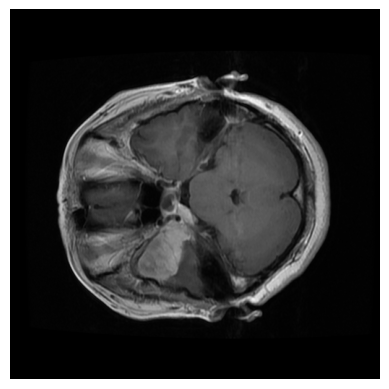

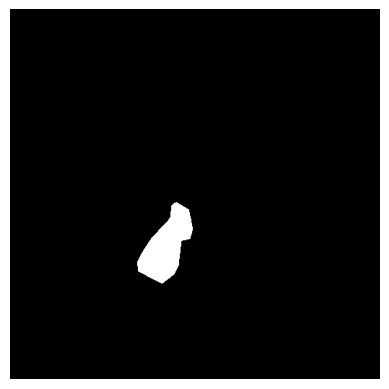

In [14]:
with h5py.File('dataset/imageData/1.mat', 'r') as f:
    for key in f.keys():
      print(key)
    for item in f.items():
      print(item)
    for key, val in f['cjdata'].items():
      print(key, val)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    img = img/127.5 - 1
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

A single .mat file consists of:

* **PID:** Patient ID for that particular tumor image. This is not a necessary feature.
* **image:** Image of the brain tumor
* **label:** Label between 1-3 denoting what kind of tumor is present
* **tumorBorder:** Coordinates of the tumor present in the image
* **tumorMask:** Masked version of the tumor.

We'll need the image, label, tumorBorder, tumorMask which are the necessary features that'll help us to detect brain tumors.

Create new folders named the following:

* **new_dataset:** We'll be using this folder to store our images, labels, mask and borders
* **bt_images:** We'll store the full brain tumor image in this folder
* **bt_mask:** We'll store the mask images of the brain tumor in this folder

In [ ]:
os.mkdir('augmented_dataset')
os.mkdir('augmented_dataset/bt_images') 

Create empty lists for storing labels



In [15]:
labels = []
border = []

Save images of brain tumor, masks and store labels and borders in their respective lists iteratively.

3064 files successfully saved


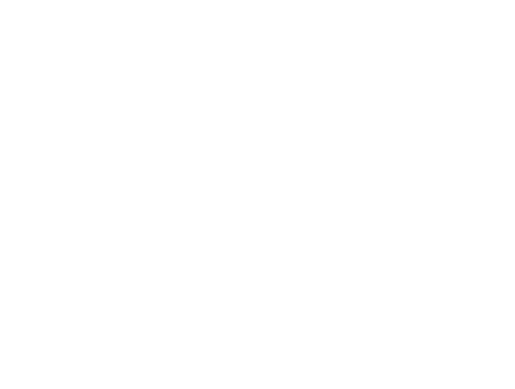

In [16]:
filename = None

for filename in range(1, 3065):
  with h5py.File('dataset/imageData/{}.mat'.format(filename), 'r') as f:
    # print("processing file:", filename)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    coord = f['cjdata']['tumorBorder']
    labels.append(int(label))
    border.append(coord)
    img = np.array(img, dtype=np.float32)
    plt.axis('off')
    plt.imsave("augmented_dataset/bt_images/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))

Convert the Python lists to a Numpy arrays

In [17]:
label_names = np.array(labels, dtype=np.int64)


Check if the array has the right shape & length.

In [18]:
label_names.shape

(3064,)

Store the labels and tumor border (coordinates) as a pickle file, which can be loaded whenever we want to use it.

In [19]:
pickle_out = open("augmented_dataset/labels.pickle","wb")                    
pickle.dump(label_names, pickle_out)
pickle_out.close() 

Create an empty list named 'training_data' in which we'll store our images and their respective labels as arrays

In [20]:
training_data = []
img = None
label = None
i = None

Read the images from bt_images folder from Google Drive and convert it to RGB images and store it along with their respective labels in the training_data list.

In [21]:
for i in range(1, 3065):
  img = cv2.imread("augmented_dataset/bt_images/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  label = label_names[i-1]
  training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

pickle_out = open("augmented_dataset/training_data.pickle","wb")                    
pickle.dump(training_data, pickle_out)
pickle_out.close()

shape: (512, 512, 3) label: 1 | 3064 samples successfully preprocessed


Store the training_data list as a pickle file